In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow 
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist
import random

In [ ]:
#Importing the data
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


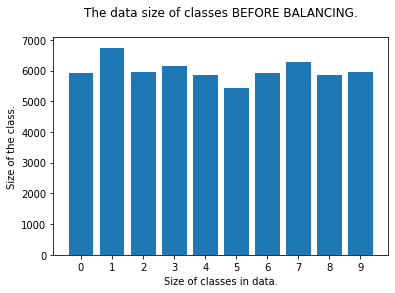

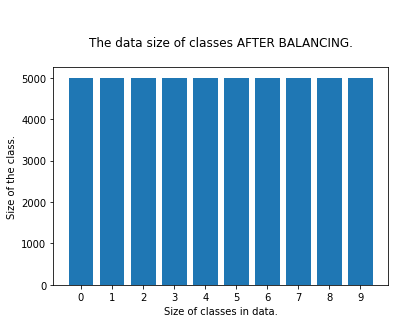

In [ ]:
#Evaluating the data
class data_manipulation:
  def imbalanced_data(X,Y):
    #Returning the same data
    return (X,Y)
  def balanced_data(X,Y):
    # Calculating the size of the each class
    data_length = np.array([0,0,0,0,0,0,0,0,0,0])
    for i in Y:  # ------- Complexity is O(N)
      data_length[i] += 1
    data_labels = np.array(['0','1','2','3','4','5','6','7','8','9'])
    plt.figure()
    plt.title('The data size of classes BEFORE BALANCING.\n')
    plt.xlabel('Size of classes in data.')
    plt.ylabel('Size of the class.')
    plt.bar(data_labels, data_length)
    plt.show()
    
    # Getting the indices of the data to retrive the data by indices.
    balanced_data_length = np.array([0,0,0,0,0,0,0,0,0,0])
    data_indices = []
    for i,j in zip(Y,range(0,len(Y))):  # ------- Complexity is O(N)
      if balanced_data_length[i] < 5000:
        balanced_data_length[i] += 1
        data_indices.append(j)
      else:
        pass
    
    # Creating the balanced dataset
    balanced_x = []
    balanced_y = []
    for i in data_indices:
      balanced_x.append(X[i])
      balanced_y.append(Y[i])
    balanced_x = np.array(balanced_x)
    balanced_y = np.array(balanced_y)

    # Calculating the size of the each class and Displaying the data
    data_length_1 = np.array([0,0,0,0,0,0,0,0,0,0])
    for i in balanced_y:  # ------- Complexity is O(N)
      data_length_1[i] += 1
    data_labels_1 = np.array(['0','1','2','3','4','5','6','7','8','9'])
    plt.figure()
    plt.title('\n\nThe data size of classes AFTER BALANCING.\n')
    plt.xlabel('Size of classes in data.')
    plt.ylabel('Size of the class.')
    plt.bar(data_labels_1, data_length_1)
    plt.show()
    # Returning the balanced values
    return (balanced_x,balanced_y)
  def balanced_and_symetric_data(X,Y):
    #Getting the balanced data from the function
    # As we have already balanced the dataset expicitlly as 5000 for each class
    # I am going to change the last 500 values as from backwards.
    balanced_and_symetric_data_Y = []
    data_length_1 = np.array([0,0,0,0,0,0,0,0,0,0])
    for i in Y:  # ------- Complexity is O(N)
      if 4499 < data_length_1[i] < 5000:
        data_length_1[i] += 1
        balanced_and_symetric_data_Y.append(9-i)
      else:
        balanced_and_symetric_data_Y.append(i)
    return (X, np.array(balanced_and_symetric_data_Y))

  def imbalanced_and_symetric_data(X,Y):
    #Getting the balanced data from the function
    # As we have already balanced the dataset expicitlly as 5000 for each class
    # I am going to change the last 500 values as from backwards.
    imbalanced_and_symetric_data_Y = []
    data_length_1 = np.array([0,0,0,0,0,0,0,0,0,0])
    for i in Y:  # ------- Complexity is O(N)
      if 4499 < data_length_1[i] < 5000:
        data_length_1[i] += 1
        imbalanced_and_symetric_data_Y.append(9-i)
      else:
        imbalanced_and_symetric_data_Y.append(i)
    return (X, random.shuffle(np.array(imbalanced_and_symetric_data_Y)))

data = data_manipulation
(Imbalanced_X_train, Imbalanced_Y_train) = data.imbalanced_data(X_train,Y_train)
(Balanced_X_train, Balanced_Y_train) = data.balanced_data(X_train,Y_train)
(Symetric_Balanced_X_train,Symetric_Balanced_Y_train) = data.balanced_and_symetric_data(Balanced_X_train,Balanced_Y_train)

In [ ]:
#Creating the class of the ML and DL models.
class models_:
  def proposed_DL_model(X,Y):
    X_test = X[0:4000]
    Y_test = Y[0:4000]
    X_test = X[4000:5000]
    Y_test = Y[4000:5000]
    model=keras.Sequential(name='Digit_pattern_recognition')
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(128,activation='relu',name='Hinden1'))
    model.add(layers.Dense(64,activation='relu',name='Hinden2'))
    model.add(layers.Dense(10,activation='softmax',name='ouput_Layer'))
    keras.utils.plot_model(model,'mnist_classifier.png')
    model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])
    model.fit(X_train,Y_train,epochs=10)
    output_ = model.evaluate(X_test,Y_test)
    return (output_[1]*100)

model = models_

In [ ]:
accuracy_imbalnced = model.proposed_DL_model(X_train,Y_train)
accuracy_balnced = model.proposed_DL_model(Balanced_X_train,Balanced_Y_train)
accuracy_balanced_symetric = model.proposed_DL_model(Symetric_Balanced_X_train,Symetric_Balanced_Y_train) 

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 4s 2ms/step - loss: 1.5171 - accuracy: 0.8582
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3025 - accuracy: 0.9261
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2034 - accuracy: 0.9462
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1588 - accuracy: 0.9569
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1429 - accuracy: 0.9614
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1213 - accuracy: 0.9670
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1105 - accuracy: 0.9700
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1015 - accuracy: 0.9730
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0885 - accuracy: 0.9763
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.0680 - accuracy: 0

In [ ]:
print(accuracy_imbalnced)
print(accuracy_balnced)
print(accuracy_balanced_symetric)

97.79999852180481
98.29999804496765
97.89999723434448


#PROPOSED ML MODEL

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score
import matplotlib.pyplot as plt

In [ ]:
def flatter_(x):
  X = []
  for i in x:
    X.append(np.resize(i,1024))
  return np.array(X)

X_tb = flatter_(Balanced_X_train)
X_imb = flatter_(Imbalanced_X_train)
X_bs = flatter_(Symetric_Balanced_X_train)
X_te = flatter_(X_test)


In [ ]:
# Declaring the Random Forest
rd = RandomForestClassifier(criterion = 'entropy')

In [ ]:
# For Balanced
rd.fit(X_tb, Y_train[0:50000])
rd.score(X_tb, Y_train[0:50000])

0.99994

In [ ]:
predicted = rd.predict(X_te)
print(accuracy_score(Y_test, predicted))

0.9654


In [ ]:
# For ImBalanced
rd.fit(X_imb, Imbalanced_Y_train)
rd.score(X_imb, Imbalanced_Y_train)

1.0

In [ ]:
predicted = rd.predict(X_te)
print(accuracy_score(Y_test, predicted))

0.9686


In [ ]:
# For Balanced and Symetric
rd.fit(X_bs, Symetric_Balanced_Y_train)
rd.score(X_bs, Symetric_Balanced_Y_train)

1.0

In [ ]:
predicted = rd.predict(X_te)
print(accuracy_score(Y_test, predicted))

0.9671
